In [13]:
# Step: 1 Import necessary packages
import pandas as pd  #for dataframe and analysis
import numpy as np  #for number operations
import seaborn as sns #for visualisation
import matplotlib.pyplot as plt #for visualisation
from sklearn.model_selection import train_test_split   #for splitting the train and test data
from sklearn.preprocessing import StandardScaler #for normalize the data
from sklearn.naive_bayes import MultinomialNB  #Calling the model
from sklearn.metrics import accuracy_score  #Evaluation

In [237]:
#Step: 2) Importing the dataset
wine_df=pd.read_csv(r"E:\Data_Analysis\wine.csv")
wine_df.head(10)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [238]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [239]:
wine_df1=wine_df.copy()
wine_df1.head(10)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [240]:
#Step 3) Analysis and preprocessing:
wine_df1.isna().sum()  #No null values

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [56]:
wine_df1.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [57]:
wine_df1.corr() #Checking for anomoly like multicollinearity

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [8]:
# Since OD having some multicollinearity, even though Naive Byes handles Multicollinearity, droping the column to check if the efficiency increases.
wine_df1.drop("OD",inplace=True, axis=1)
wine_df1.head(10)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,1045


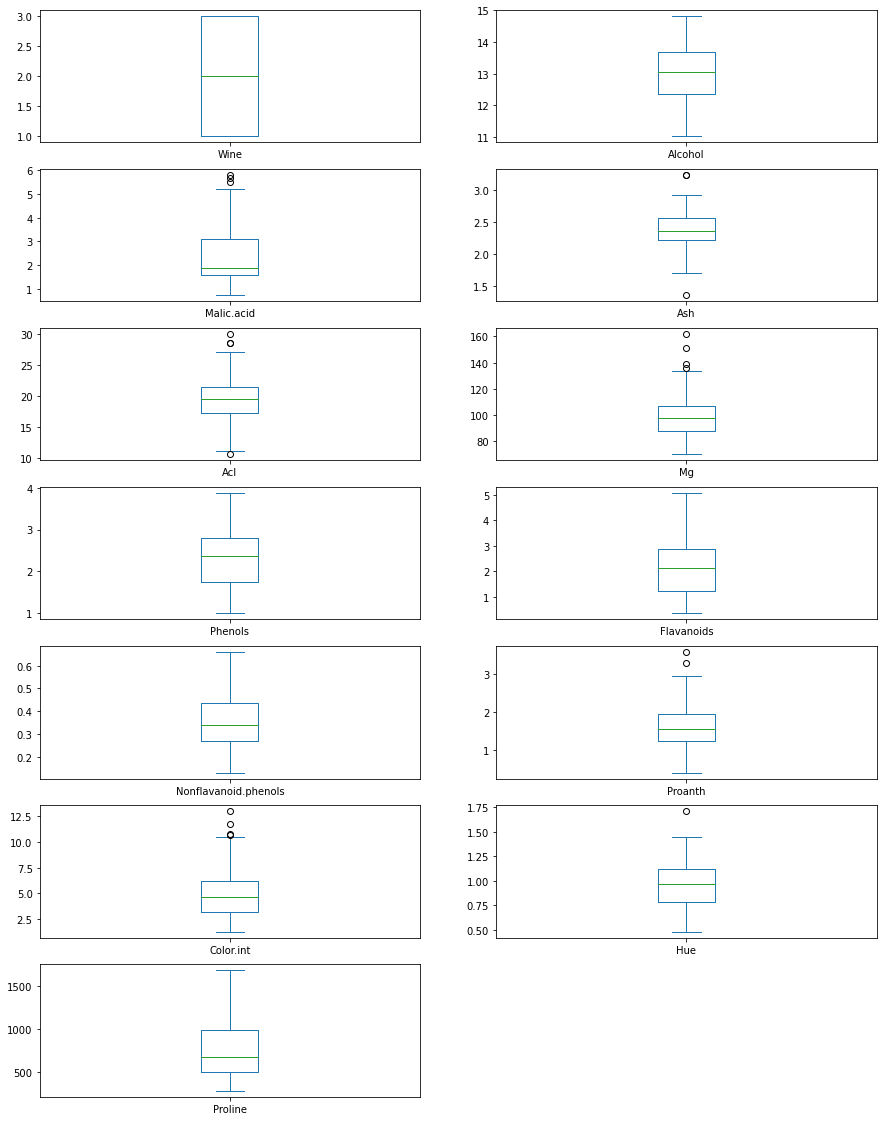

In [12]:
#Checking for outliers. Using Box_whisker plot.
wine_df1.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

In [ ]:
#Above plots indicates that, Proline, Nonflavanoid.phenols,Phenols,Flavanoids,Alcohol has no outliers.

In [58]:
#Step: 4 Splitting the data into IV and DV-Independent Variable and Dependent Variable
X=wine_df1.drop("Wine",axis=1)
Y=wine_df1["Wine"]

In [305]:
#Step: 4 Splitting the data into train and test data
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.50,random_state=20)
model= MultinomialNB()       #Calling the model
model.fit(X_train, Y_train)  #Train the model using the training sets
predictions = model.predict(X_test) #Predict the response for test dataset
print(predictions)

[2 2 2 3 2 3 3 3 2 3 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 3 1 1 1 2 2 2 3 2 3 3 2
 1 3 1 1 1 3 2 3 3 2 1 2 1 1 1 2 3 1 3 2 1 2 1 3 2 2 1 1 3 2 1 1 2 1 2 3 2
 1 1 2 2 3 2 2 2 1 2]


In [306]:
#Step: 5 Evaluations:
accuracy_score(Y_test, predictions)  #Accuracy score for the Naive Bayes model without outlier treatment is 86.904%

0.8690476190476191

In [241]:
#Treating the Outliers 
#Z-Score method:
wine_df1.shape

(178, 14)

In [242]:
from scipy import stats

In [243]:
wine_df1.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [244]:
wine_df1.drop("OD",inplace=True, axis=1)

In [245]:
X=wine_df1.drop("Wine",axis=1)
Y=wine_df1["Wine"]

In [260]:
z=stats.zscore(wine_df1[["Malic.acid","Mg","Ash","Acl","Proanth","Color.int","Hue","Alcohol","Phenols","Flavanoids","Nonflavanoid.phenols","Proline"]])
print(z)

     Malic.acid        Mg       Ash       Acl   Proanth  Color.int       Hue  \
0     -0.562250  1.913905  0.232053 -1.169593  1.224884   0.251717  0.362177   
1     -0.499413  0.018145 -0.827996 -2.490847 -0.544721  -0.293321  0.406051   
2      0.021231  0.088358  1.109334 -0.268738  2.135968   0.269020  0.318304   
3     -0.346811  0.930918  0.487926 -0.809251  1.032155   1.186068 -0.427544   
4      0.227694  1.281985  1.840403  0.451946  0.401404  -0.319276  0.362177   
..          ...       ...       ...       ...       ...        ...       ...   
173    2.974543 -0.332922  0.305159  0.301803 -0.930179   1.142811 -1.392758   
174    1.412609  0.158572  0.414820  1.052516 -0.316950   0.969783 -1.129518   
175    1.744744  1.422412 -0.389355  0.151661 -0.422075   2.224236 -1.612125   
176    0.227694  1.422412  0.012732  0.151661 -0.229346   1.834923 -1.568252   
177    1.583165 -0.262708  1.365208  1.502943 -0.422075   1.791666 -1.524378   

      Alcohol   Phenols  Flavanoids  No

In [279]:
threshold=3 #Z-score greater than 3 consider as the 
print(np.where(z>3))

(array([ 25,  69,  73,  95, 110, 115, 121, 121, 123, 158], dtype=int64), array([2, 1, 3, 1, 4, 6, 2, 9, 0, 5], dtype=int64))


In [280]:
X=X[(z< 3)]
print(X)


     Alcohol  Malic.acid   Ash   Acl     Mg  Phenols  Flavanoids  \
0      14.23        1.71  2.43  15.6  127.0     2.80        3.06   
1      13.20        1.78  2.14  11.2  100.0     2.65        2.76   
2      13.16        2.36  2.67  18.6  101.0     2.80        3.24   
3      14.37        1.95  2.50  16.8  113.0     3.85        3.49   
4      13.24        2.59  2.87  21.0  118.0     2.80        2.69   
..       ...         ...   ...   ...    ...      ...         ...   
173    13.71        5.65  2.45  20.5   95.0     1.68        0.61   
174    13.40        3.91  2.48  23.0  102.0     1.80        0.75   
175    13.27        4.28  2.26  20.0  120.0     1.59        0.69   
176    13.17        2.59  2.37  20.0  120.0     1.65        0.68   
177    14.13        4.10  2.74  24.5   96.0     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue  Proline  
0                    0.28     2.29       5.64  1.04     1065  
1                    0.26     1.28       4.38  1.05     1

In [281]:
X.isna().sum()

Alcohol                 0
Malic.acid              1
Ash                     3
Acl                     1
Mg                      2
Phenols                 0
Flavanoids              1
Nonflavanoid.phenols    0
Proanth                 1
Color.int               1
Hue                     1
Proline                 0
dtype: int64

In [282]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [283]:
wine_df2 = pd.concat([X,Y], axis=1)
wine_df2.head(100)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,1065,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,1050,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,1185,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,1480,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12.47,1.52,2.20,19.0,NaN,2.50,2.27,0.32,3.28,2.60,1.16,937,2
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,625,2
97,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,428,2
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,660,2


In [284]:
wine_df3=wine_df2.dropna(subset=["Mg","Malic.acid","Ash","Acl","Proanth","Color.int","Hue","Flavanoids"])
print(wine_df3)


     Alcohol  Malic.acid   Ash   Acl     Mg  Phenols  Flavanoids  \
0      14.23        1.71  2.43  15.6  127.0     2.80        3.06   
1      13.20        1.78  2.14  11.2  100.0     2.65        2.76   
2      13.16        2.36  2.67  18.6  101.0     2.80        3.24   
3      14.37        1.95  2.50  16.8  113.0     3.85        3.49   
4      13.24        2.59  2.87  21.0  118.0     2.80        2.69   
..       ...         ...   ...   ...    ...      ...         ...   
173    13.71        5.65  2.45  20.5   95.0     1.68        0.61   
174    13.40        3.91  2.48  23.0  102.0     1.80        0.75   
175    13.27        4.28  2.26  20.0  120.0     1.59        0.69   
176    13.17        2.59  2.37  20.0  120.0     1.65        0.68   
177    14.13        4.10  2.74  24.5   96.0     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue  Proline  Wine  
0                    0.28     2.29       5.64  1.04     1065     1  
1                    0.26     1.28       4.38

In [285]:
wine_df3.head(100)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,1065,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,1050,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,1185,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,1480,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,710,2
101,12.60,1.34,1.90,18.5,88.0,1.45,1.36,0.29,1.35,2.45,1.04,562,2
102,12.34,2.45,2.46,21.0,98.0,2.56,2.11,0.34,1.31,2.80,0.80,438,2
103,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,415,2


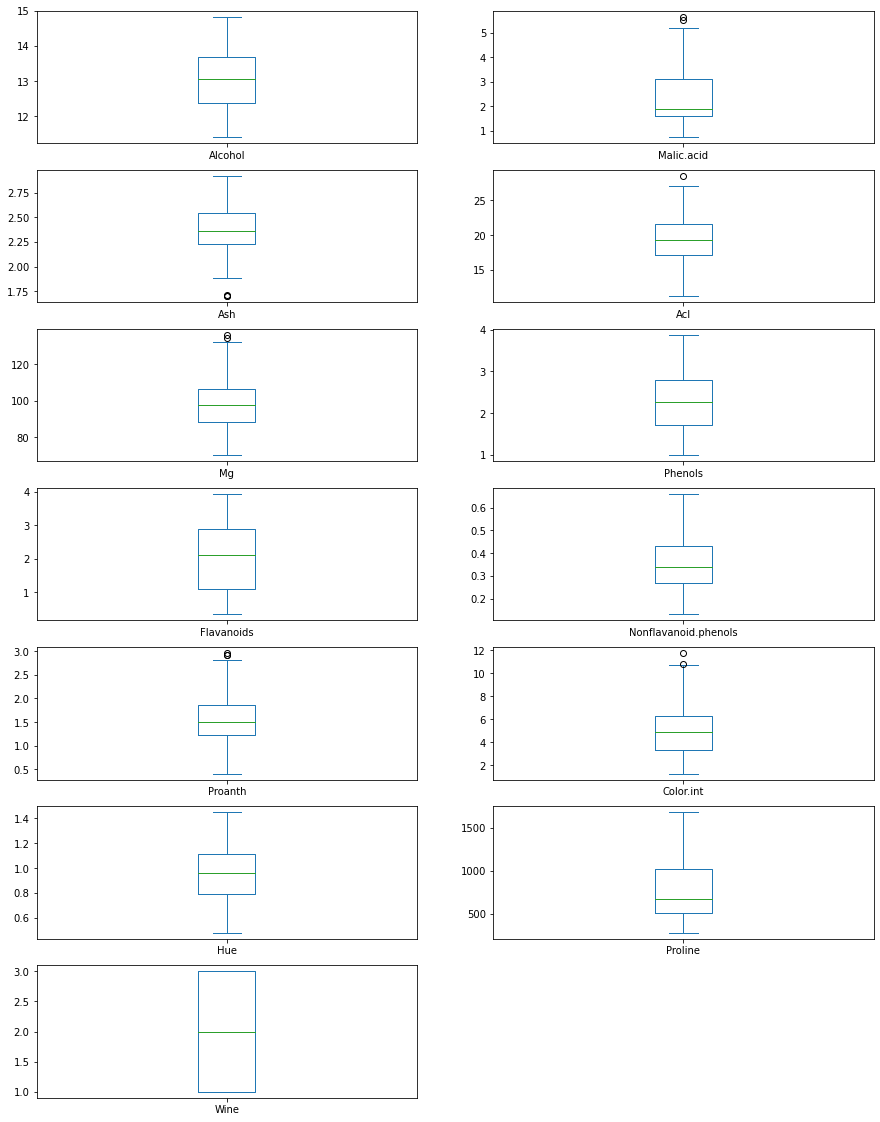

In [286]:
wine_df3.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

In [287]:
wine_df3.isna().sum()

Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
Proline                 0
Wine                    0
dtype: int64

In [288]:
wine_df3.shape

(168, 13)

In [289]:
#Step: 4 Splitting the data into IV and DV-Independent Variable and Dependent Variable
X=wine_df3.drop("Wine",axis=1)
Y=wine_df3["Wine"]

In [302]:
#Step: 4 Splitting the data into train and test data
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.50,random_state=20)
model= MultinomialNB()       #Calling the model
model.fit(X_train, Y_train)  #Train the model using the training sets
predictions = model.predict(X_test) #Predict the response for test dataset
print(predictions)

[2 2 2 3 2 3 3 3 2 3 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 3 1 1 1 2 2 2 3 2 3 3 2
 1 3 1 1 1 3 2 3 3 2 1 2 1 1 1 2 3 1 3 2 1 2 1 3 2 2 1 1 3 2 1 1 2 1 2 3 2
 1 1 2 2 3 2 2 2 1 2]


In [303]:
#Step: 5 Evaluations:
accuracy_score(Y_test, predictions) 

0.8690476190476191

In [304]:
#Using the Z-score method, the accuracy for the Naive Bayes model gives score of 86.904%. Both Outlier Treatment VS No outlier Treatment is not affected the model accuracy